# APLICACION DE KMEANS

# Test de Alerta sobre un noviazgo violento

**Información respecto a las 10 preguntas y sus valores:**

pregunta 1: Cuando no están juntos, ¿tu pareja te controla preguntándote con quién estás, dónde y qué estás haciendo mensajeando por celular?

pregunta 2: ¿Revisa los mensajes de tu celular o te pidió la contraseña de tu correo electrónico, Facebook o Instagram como “prueba de confianza”?

pregunta 3: ¿Te acusa de haber sido infiel o coquetear con otros/as?

pregunta 4: ¿Sentís que están permanentemente en tensión y que, hagas lo que hagas, se irrita o te culpabiliza de sus cambios de humor?

pregunta 5: ¿Le molesta que hagas actividades de manera independiente, como estudiar, trabajar, visitar amigos/as, ir al gimnasio o elegir quedarte sola/o en tu casa?

pregunta 6: ¿Sentís que te alejaste o perdiste contacto con amigos/as o familiares desde que estás en pareja?

pregunta 7: ¿Te dice cómo tenés que vestirte o cómo debe ser tu apariencia?

pregunta 8: ¿Menosprecia en público o en privado tus opiniones?

pregunta 9: ¿Te dice que todo lo que hacés está mal o que no servís para nada?

pregunta 10: ¿Te amenaza con lastimarse/te si no lo/la obedeces o si querés terminar la relación?


#### Información sobre las respuestas al test de Señales de Alerta en el noviazgo. Referencias: A="siempre" B="a veces" C="nunca"


In [83]:
# Analisis exploratorio y limpieza
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Standar Scaler
from sklearn.preprocessing import StandardScaler

## Analisis breve del dataset

In [84]:
data = pd.read_csv('resultados-del-test-febrero-octubre-2018.csv', sep=';')
data.head()

,FECHA,HORA,EDAD,GENERO,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10
0,13/02/2017,23:41,28,HOMBRE,PALERMO,B,B,B,B,B,B,B,B,B,B
1,13/02/2017,20:09,23,MUJER,BALVANERA,B,B,B,B,B,B,B,B,B,B
2,13/02/2017,20:07,22,MUJER,BALVANERA,A,A,A,A,A,A,A,A,B,C
3,13/02/2017,20:04,34,MUJER,VILLA PUEYRREDON,C,C,B,C,B,C,C,C,C,B
4,13/02/2017,19:34,31,MUJER,CABALLITO,C,C,C,C,C,C,C,C,C,C


In [85]:
print(f'Cantidad de filas y columnas:\n{data.shape}')

Cantidad de filas y columnas:
(11643, 15)


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11643 entries, 0 to 11642
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    11643 non-null  object
 1   HORA     11643 non-null  object
 2   EDAD     11643 non-null  object
 3   GENERO   11643 non-null  object
 4   BARRIO   11643 non-null  object
 5   PREG_1   11643 non-null  object
 6   PREG_2   11643 non-null  object
 7   PREG_3   11643 non-null  object
 8   PREG_4   11643 non-null  object
 9   PREG_5   11643 non-null  object
 10  PREG_6   11643 non-null  object
 11  PREG_7   11643 non-null  object
 12  PREG_8   11643 non-null  object
 13  PREG_9   11643 non-null  object
 14  PREG_10  11643 non-null  object
dtypes: object(15)
memory usage: 1.3+ MB


## 1) Limpieza del dataset

1.1) Datos repetidos.

1.2) Columnas que no nos sirvan.

1.3) Valores nulos o faltantes.

1.4) Cambiar el tipo de datos de la variable edad.

1.5) Analizamos los valores unicos de las preguntas y los cambiamos por valores numericos. (0,1,2).

1.6) Cambiamos los valores de la variable GENERO a 0 y 1.

##### 1.1) Datos repetidos.

In [87]:
data_train = data

print(f'Filas y columnas sin eliminar duplicados:\n{data_train.shape}\n')
data_train.drop_duplicates(inplace=True)
print(f'Filas y columnas eliminando duplicados:\n{data_train.shape}\n')

Filas y columnas sin eliminar duplicados:
(11643, 15)

Filas y columnas eliminando duplicados:
(11625, 15)



##### 1.2) Columnas que no nos sirvan.

Vamos a eliminar las columnas que no nos ayuden con el objetivo principal del analisis del dataset.

In [88]:
data.columns

Index(['FECHA', 'HORA', 'EDAD', 'GENERO', 'BARRIO', 'PREG_1', 'PREG_2',
       'PREG_3', 'PREG_4', 'PREG_5', 'PREG_6', 'PREG_7', 'PREG_8', 'PREG_9',
       'PREG_10'],
      dtype='object')

In [89]:
data_train = data.drop(columns=['FECHA','HORA','BARRIO'])
data_train.head(1)

,EDAD,GENERO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10
0,28,HOMBRE,B,B,B,B,B,B,B,B,B,B


##### 1.2) Valores nulos o faltantes.

Comprobemos si tenemos valores nulos en el dataset. En caso de que halla algunos, veamos como podemos manejarlos.

In [90]:
print(f'Valores nulos:\n{data_train.isna().sum()}')

Valores nulos:
EDAD       0
GENERO     0
PREG_1     0
PREG_2     0
PREG_3     0
PREG_4     0
PREG_5     0
PREG_6     0
PREG_7     0
PREG_8     0
PREG_9     0
PREG_10    0
dtype: int64


##### 1.4) Cambiamos el tipo de dato de la variable edad (objecto) a entero.

In [91]:
try:
    data_train['EDAD'] = data_train['EDAD'].astype('int')
except Exception as error:
    print(error)

invalid literal for int() with base 10: '<18'


In [92]:
menores_18 = data_train['EDAD'] == '<18'
menores_18.sum()

889

Si queremos cambiar la variable a enteros, primero debemos reemplazar o eliminar los valores que contengan: '<18'.
Descartamos la opcion de eliminar las filas con esos datos, ya que son una gran cantidad. Vamos a reemplazarlo por 18, ya que es el numero mas cercano de los menores de edad.

In [93]:
data_train['EDAD'].replace({'<18':18}, inplace=True)

try:
    data_train['EDAD'] = data_train['EDAD'].astype('int')
except Exception as error:
    print(error)
finally:
    print(f'El cambio se hizo correctamente.')
    print(data_train.dtypes)

El cambio se hizo correctamente.
EDAD        int32
GENERO     object
PREG_1     object
PREG_2     object
PREG_3     object
PREG_4     object
PREG_5     object
PREG_6     object
PREG_7     object
PREG_8     object
PREG_9     object
PREG_10    object
dtype: object


##### 1.5) Valores unicos y reemplazo por valores numericos.

In [94]:
variables = ['GENERO','PREG_1','PREG_2','PREG_3','PREG_4','PREG_5','PREG_6','PREG_7','PREG_8','PREG_9','PREG_10']

for i in variables:
    print(f'Valores unicos de la variable {i}\n{data_train[i].unique()}')

Valores unicos de la variable GENERO
['HOMBRE' 'MUJER' 'OTRO']
Valores unicos de la variable PREG_1
['B' 'A' 'C']
Valores unicos de la variable PREG_2
['B' 'A' 'C']
Valores unicos de la variable PREG_3
['B' 'A' 'C']
Valores unicos de la variable PREG_4
['B' 'A' 'C']
Valores unicos de la variable PREG_5
['B' 'A' 'C']
Valores unicos de la variable PREG_6
['B' 'A' 'C']
Valores unicos de la variable PREG_7
['B' 'A' 'C']
Valores unicos de la variable PREG_8
['B' 'A' 'C']
Valores unicos de la variable PREG_9
['B' 'C' 'A']
Valores unicos de la variable PREG_10
['B' 'C' 'A']


Reemplazemos los valores de la columna GENERO por numericos con get_dummies.

In [95]:
data_train = pd.get_dummies(data_train, columns=['GENERO'])
data_train.head(1)

,EDAD,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO
0,28,B,B,B,B,B,B,B,B,B,B,1,0,0


Ahora reemplazemos los valores en las columnas de preguntas. (A,B,C) => (0,1,2)

In [99]:
variables_preg = ['PREG_1','PREG_2','PREG_3','PREG_4','PREG_5','PREG_6','PREG_7','PREG_8','PREG_9','PREG_10']

for i in variables_preg:
    data_train[i].replace(['A','B','C'], [0,1,2], inplace=True)
        
data_train.head()

,EDAD,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO
0,28,1,1,1,1,1,1,1,1,1,1,1,0,0
1,23,1,1,1,1,1,1,1,1,1,1,0,1,0
2,22,0,0,0,0,0,0,0,0,1,2,0,1,0
3,34,2,2,1,2,1,2,2,2,2,1,0,1,0
4,31,2,2,2,2,2,2,2,2,2,2,0,1,0


**Conclusion de la limpieza de datos:**

1) Tenemos un total de 18 valores repetidos. Podemos llegar a pensar de los individuos respondieron a las preguntas de igual manera. Sin embargo, seria mucha considencia que sea en la misma fecha, horario y el mismo barrio.

2) Eliminamos las columnas fecha, hora y barrio ya que no determinan si alguien sufre violencia o no.

3) El dataset no tiene valores faltantes, por lo que no es necesario modificar nada.

4) Cambiamos la variable EDAD de object a int.

5) Por ultimo, reemplazamos los valores categoricos por numericos. Para la variable GENERO utilizamos get_dummies que nos dividio en tres columnas:

    - GENERO_HOMBRE
    
    - GENERO_MUJER
    
    - GENERO_OTRO
**(0 = NO, 1 = SI)**
    
5) En el caso de las preguntas, las referencias quedarian asi:

    - 0 = "SIEMPRE" 
    
    - 1 = "A VECES"
    
    - 2 = "NUNCA".


## 2) Analisis exploratorio (EDA)

### ¿Qué buscamos responder?

El dataset consta de encuestas a personas de diferente edad y sexo. El problema es que no tenemos una variable dependiente que nos diga si el individuo está sufriendo algún tipo de violencia durante la etapa del noviazgo. Nuestro objetivo es dividir a la población en 2 grupos, uno en los que posiblemente ya están sufriendo algún tipo de violencia y otro que no, pero deberían mantenerse alerta.

Para esto utilizaremos el algoritmo de k-means. De esta manera tendremos dos clusters.

2.1) Observar cuantos individuos fueron encuestados segun su genero.

2.2) Analisis de las variables individualmente segun el genero.

2.3) Edades de la poblacion que manejamos.

##### 2.1) Cantidad de individuos segun el genero.

0 = No, 1 = Si


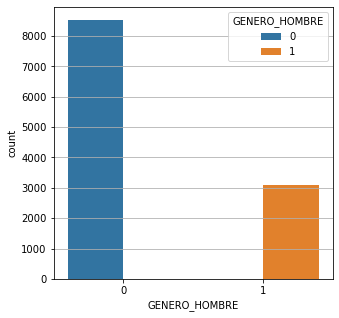

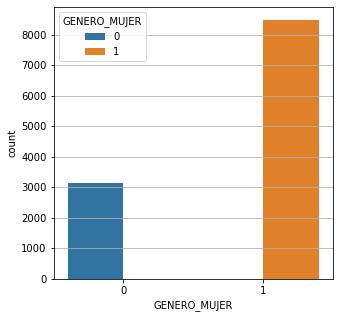

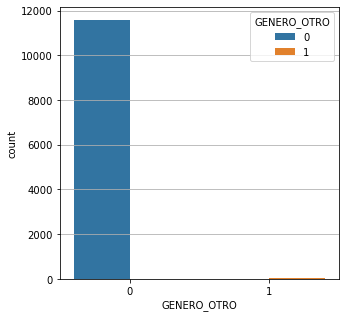

In [134]:
generos = ['GENERO_HOMBRE', 'GENERO_MUJER', 'GENERO_OTRO']

print('0 = No, 1 = Si')
for i in generos:
    plt.figure(figsize=(5,5))
    plt.grid(True)
    sns.countplot(data=data_train, x=i, hue=i)
    plt.show()

##### 2.2) Analisis de las respuestas segun el genero de los individuos.

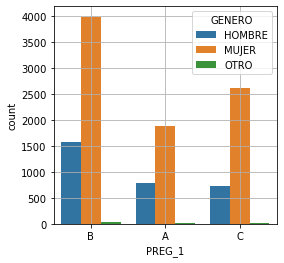

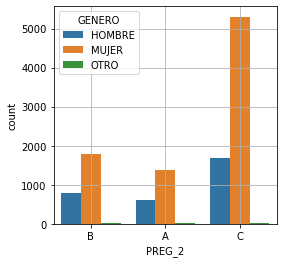

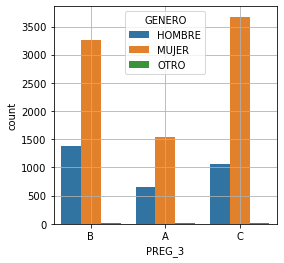

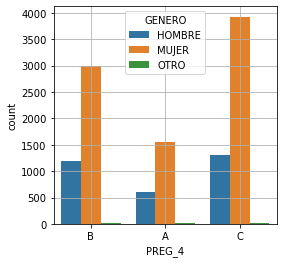

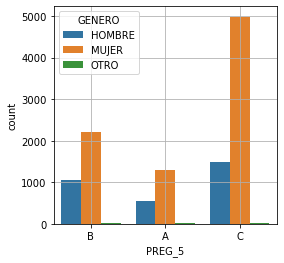

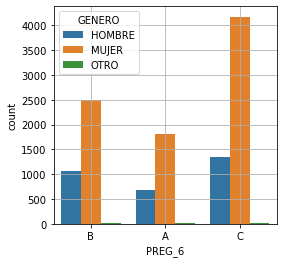

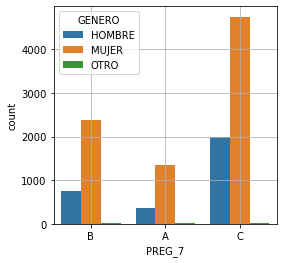

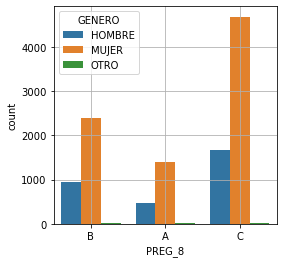

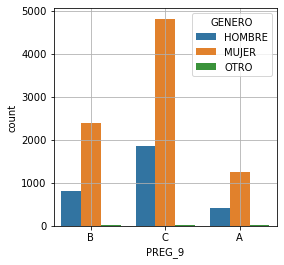

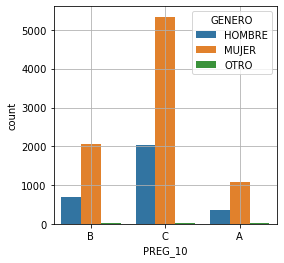

In [118]:
for i in variables_preg:
    plt.figure(figsize=(4,4))
    sns.countplot(data=data, x=i, hue='GENERO')
    plt.grid(True)
    plt.show()

##### 2.3) Edades de la poblacion que manejamos.

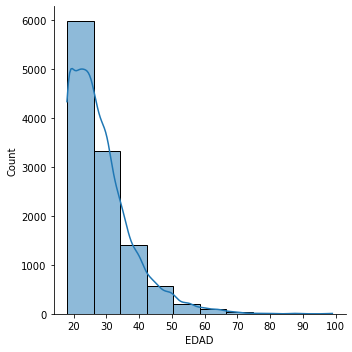

In [133]:
sns.displot(data=data_train, x='EDAD',bins=10, kind=('hist'), kde=True)
plt.show()

Manejamos una población con una gran cantidad de individuos de entre 18 y 28 años aproximadamente. A simple vista, en los primeros tres gráficos podemos ver que tenemos una mayor cantidad de mujeres que de hombres.

En el caso de las mujeres, la mayoría respondió a las preguntas con 'NUNCA', seguido por 'A VECES'. Y en los hombres, las respuestas están bastante parejas. No podemos decir nada del género 'OTRO', ya que no hay una gran cantidad de individuos.

## 3) Preparación de los datos

3.1) Estandarizado de los datos con Standar Scaler.

3.2) Aplicacion de k-means al dataset.

##### 3.1) Standar Scaler

In [137]:
data_scaler = StandardScaler().fit_transform(data_train)
data_scaler

array([[-0.03319376, -0.08011398, -0.55914035, ...,  1.65940729,
        -1.64133917, -0.06572408],
       [-0.571077  , -0.08011398, -0.55914035, ..., -0.60262481,
         0.6092586 , -0.06572408],
       [-0.67865365, -1.47222908, -1.85966188, ..., -0.60262481,
         0.6092586 , -0.06572408],
       ...,
       [-1.10896024,  1.31200112,  0.74138117, ..., -0.60262481,
         0.6092586 , -0.06572408],
       [ 2.22591585, -1.47222908, -1.85966188, ...,  1.65940729,
        -1.64133917, -0.06572408],
       [-0.03319376, -1.47222908, -0.55914035, ..., -0.60262481,
         0.6092586 , -0.06572408]])

##### 3.2) Generamos 2 clusters con K-means

In [138]:
from sklearn.cluster import KMeans

In [140]:
# Vamos a generar dos clusters (o grupos) para poder dividir aquellos que ya sufren algun tipo de violencio y los que no.
clusters = KMeans(n_clusters=2, max_iter=300)

# Lo aplicamos
clusters.fit(data_scaler)

KMeans(n_clusters=2)

Los resultados de los clusters (0 y 1) estan dentro de labels_. Vamos a crear una nueva columna con estos grupos.

In [141]:
data_train['Grupo'] = clusters.labels_
data_train.head()

,EDAD,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO,Grupo
0,28,1,1,1,1,1,1,1,1,1,1,1,0,0,1
1,23,1,1,1,1,1,1,1,1,1,1,0,1,0,1
2,22,0,0,0,0,0,0,0,0,1,2,0,1,0,1
3,34,2,2,1,2,1,2,2,2,2,1,0,1,0,0
4,31,2,2,2,2,2,2,2,2,2,2,0,1,0,0


Veamos con un grafico cuantos individuos hay en cada cluster.

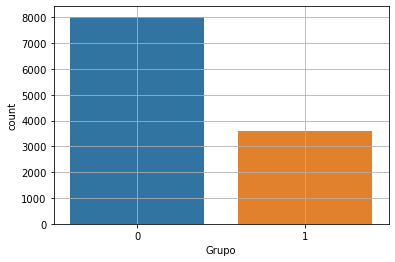

In [143]:
sns.countplot(data=data_train, x='Grupo')
plt.grid(True)
plt.show()

Tenemos aproximadamente 8000 en el grupo 0 y 3800 en el 1. Ahora, vamos a ver la diferencia que podemos encontrar. Vamos a tomar como muestra un individuo de cada grupo.

In [149]:
individuo_grupo0 = data_train.iloc[4]
individuo_grupo1 = data_train.iloc[1]
comparacion = [individuo_grupo0, individuo_grupo1]

In [150]:
data_comparacion = pd.DataFrame(comparacion)
data_comparacion.head()

,EDAD,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,GENERO_HOMBRE,GENERO_MUJER,GENERO_OTRO,Grupo
4,31,2,2,2,2,2,2,2,2,2,2,0,1,0,0
1,23,1,1,1,1,1,1,1,1,1,1,0,1,0,1


Las referencias eran:

- 0 = "SIEMPRE" 

- 1 = "A VECES"

- 2 = "NUNCA".

En este pequeño dataset tenemos dos individuos de género femenino con 8 años de diferencia. Si observamos, en el caso de la mujer que pertenece al grupo 0 respondió en todas las ocasiones 'NUNCA'. Pero la mujer que pertenece al grupo número 1, respondió en todas 'A VECES'. Esto nos puede dejar en claro que aquellos que pertenecen al grupo número 1 tienen más probabilidades de sufrir violencia en la etapa del noviazgo o ya la están sufriendo.

Comparemos ahora según el género.

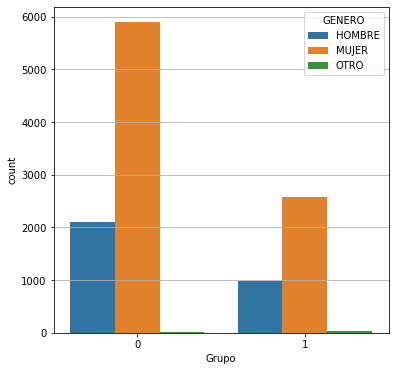

In [151]:
# Primero le agregamos la variable de cluster al dataset original
data['Grupo'] = clusters.labels_

plt.figure(figsize=(6,6))
plt.grid(True)
sns.countplot(data=data, x='Grupo', hue='GENERO')
plt.show()

En conclusión, la mayoría de los encuestados pertenecen al grupo 0, por lo que posiblemente no deberían estar en alerta por un noviazgo violento. En cambio, esa minoría que pertenece al grupo 1, sus respuestas demuestran que ya están sufriendo algún tipo de violencia o deberían tener precaución.

**De aproximadamente 3.000 hombres, 1.000 pertenecen al grupo 1. Y de 8.300 mujeres, unas 2.800.**

**Si bien esto es un análisis, todos deberíamos tener cuidado en todas las etapas de nuestra vida.**


Si bien esto es un analisis, todos deberiamos tener cuidado en todas las etapas de nuestra vida.